Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression

 
It is given by Kaggle from UCI Machine Learning Repository, in one of its challenge 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-breast_cancer. It is a breast_cancerset of Breast Cancer patients with Malignant and Benign tumor. 
Logistic Regression is used to predict whether the given patient is having Malignant or Benign tumor based on the attributes in the given breast_cancerset.

importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
breast_cancer=pd.read_csv('data1.csv')

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_cancer.shape

(569, 33)

Datapreprocessing

In [5]:
breast_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
breast_cancer.drop(columns=['Unnamed: 32'], inplace=True)

In [7]:
breast_cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
breast_cancer.drop(columns=['id'], inplace=True)

In [9]:
breast_cancer.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

data visualization

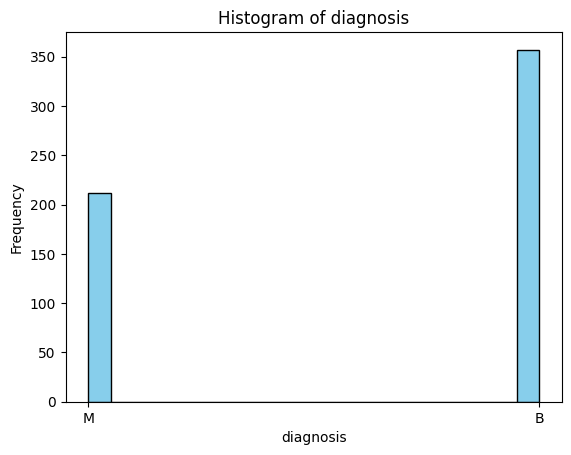

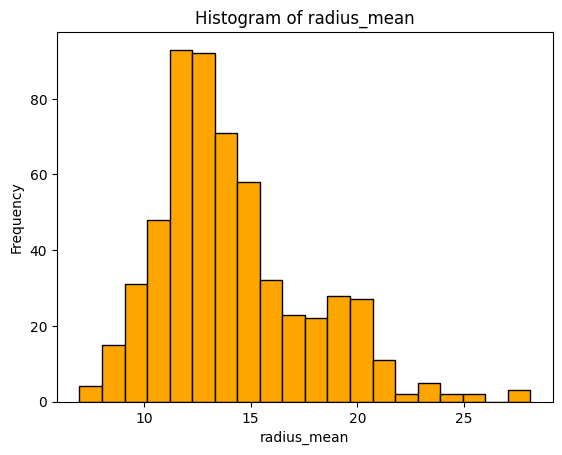

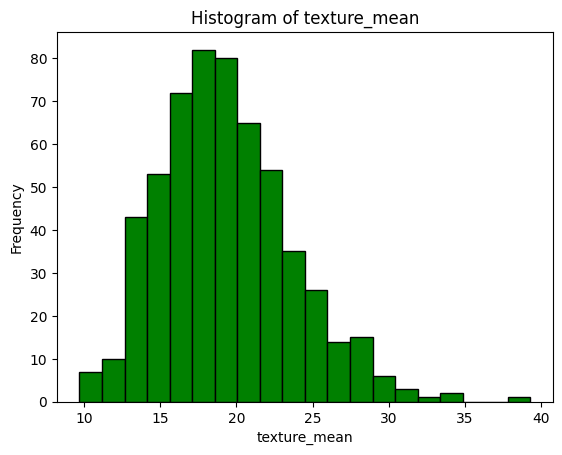

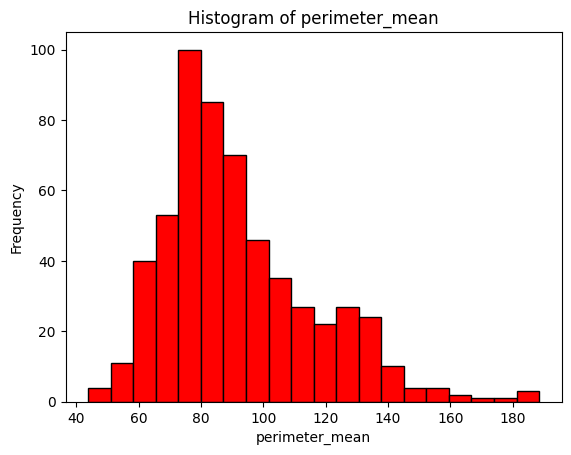

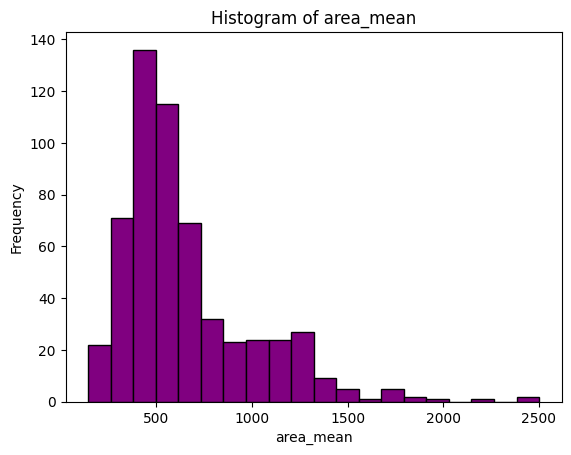

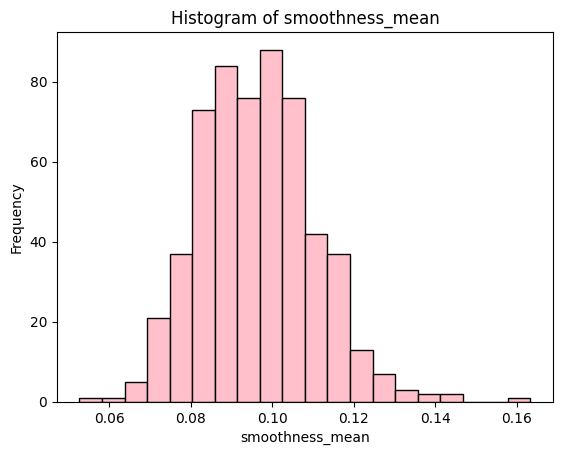

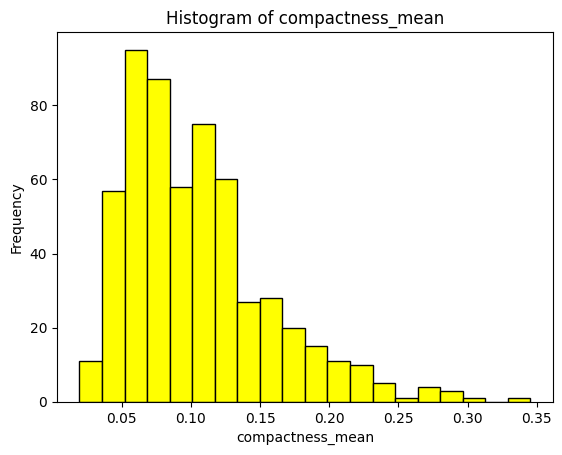

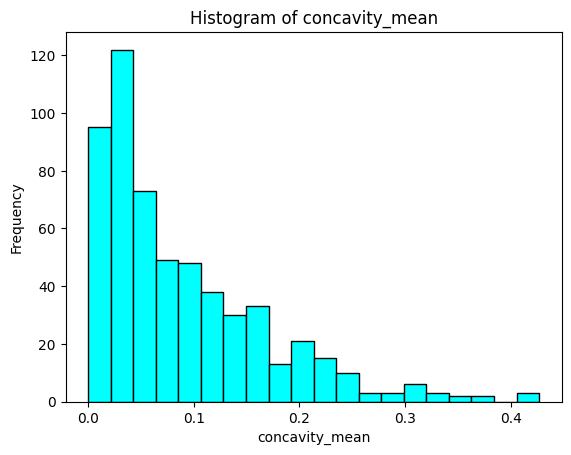

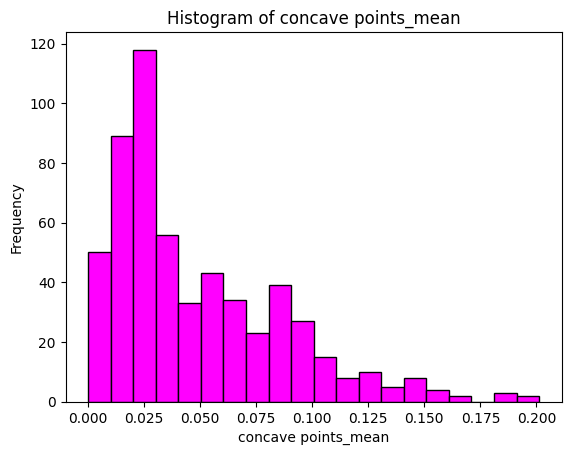

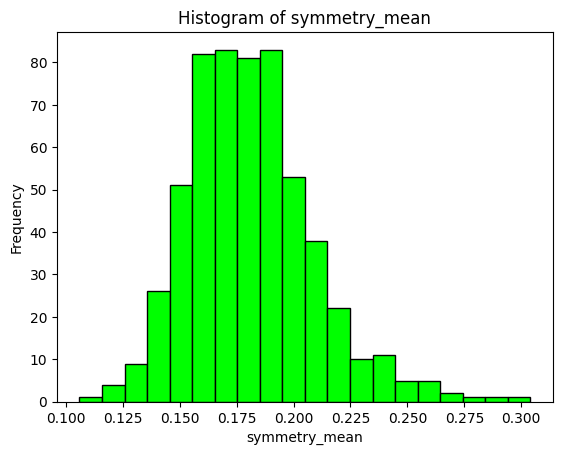

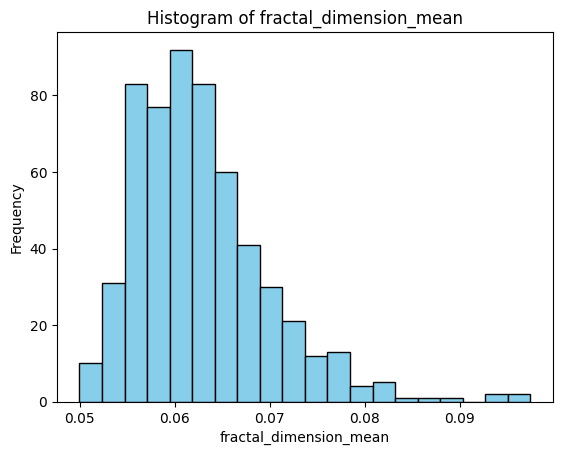

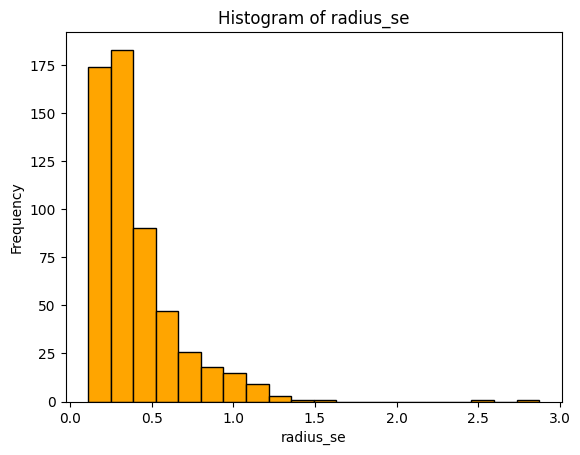

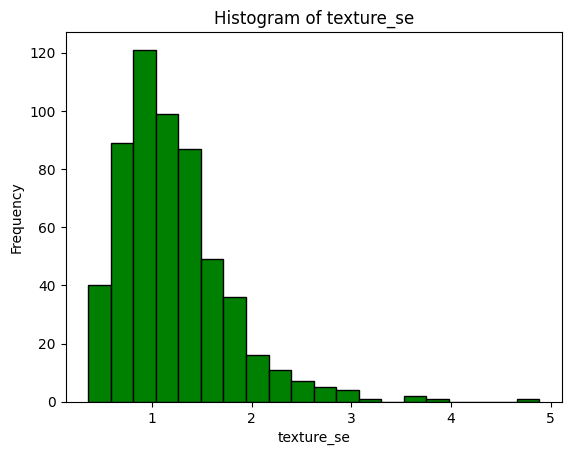

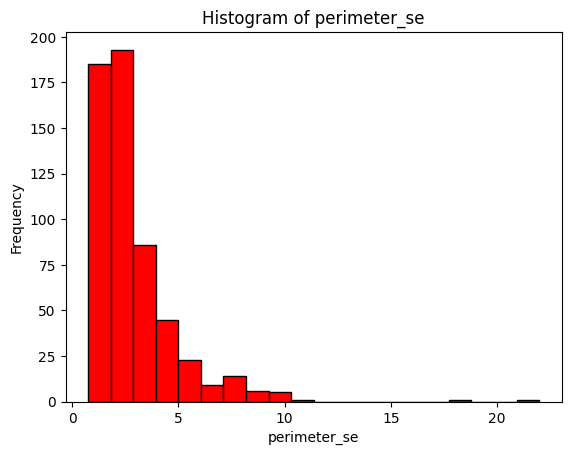

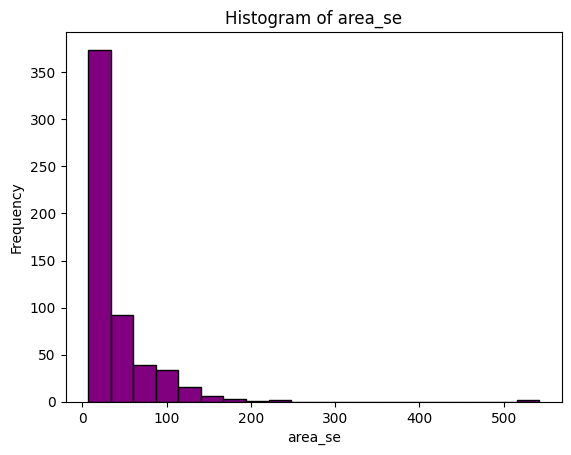

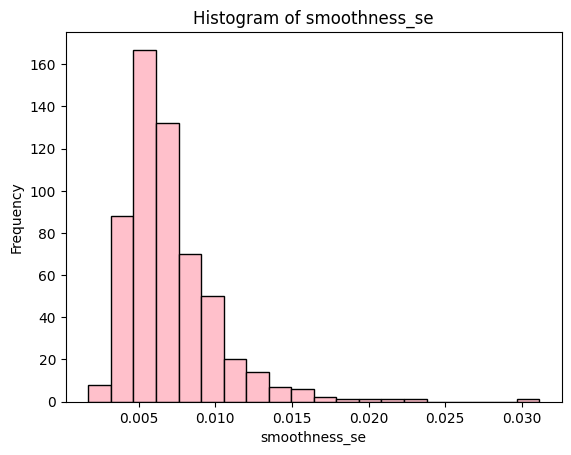

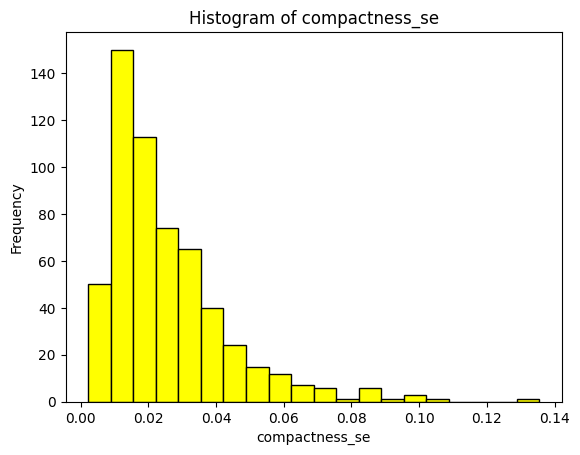

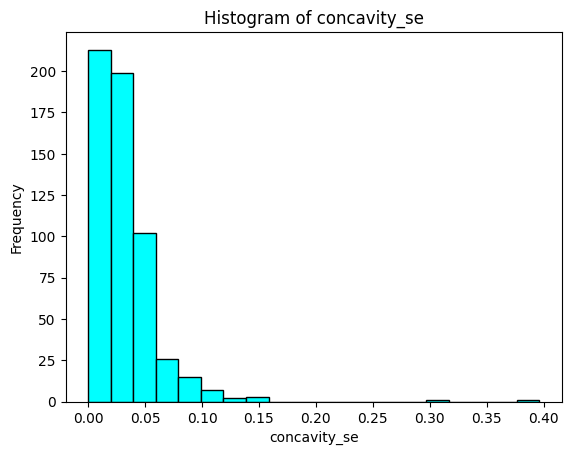

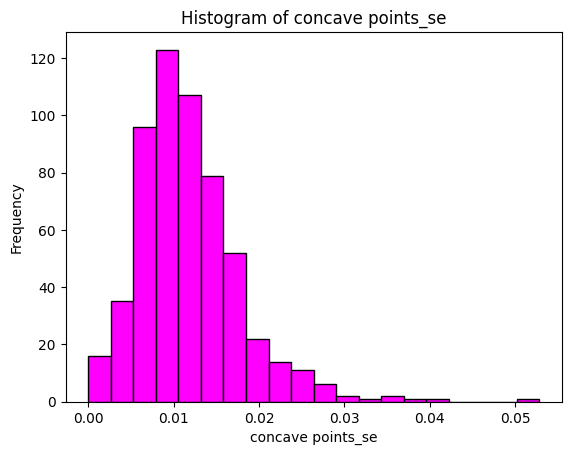

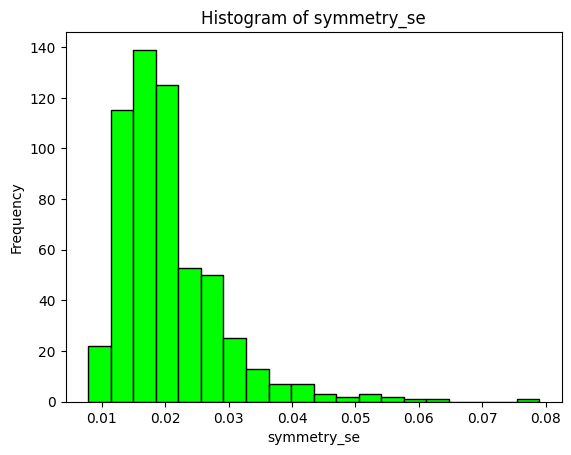

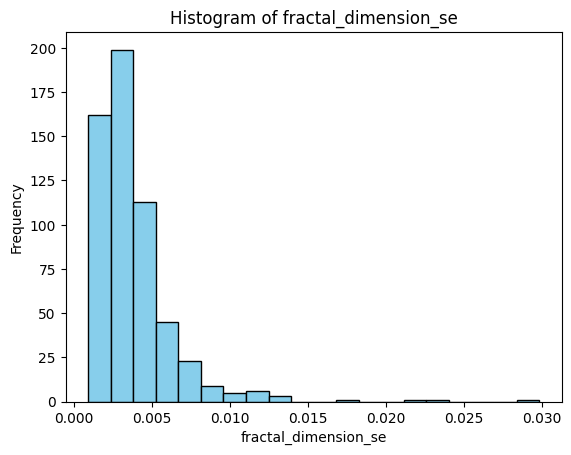

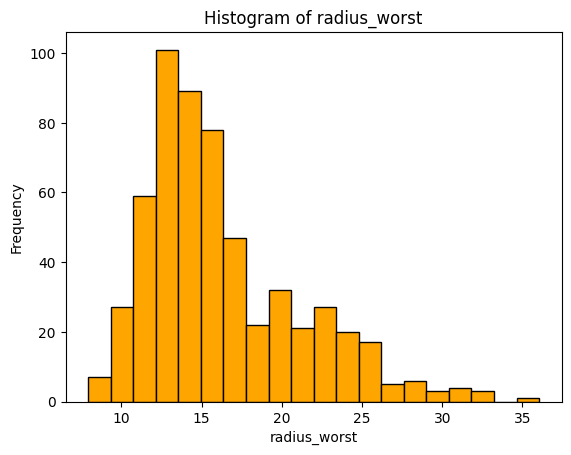

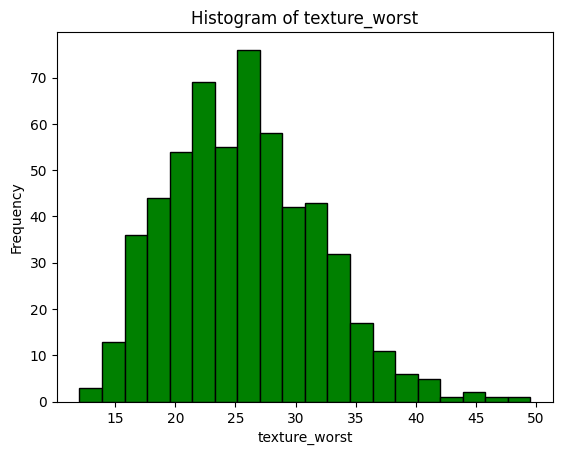

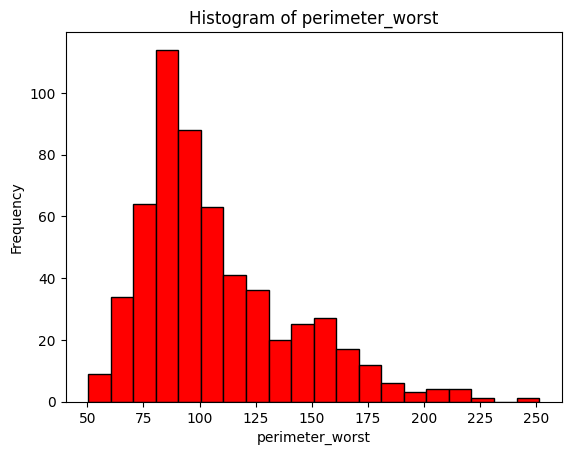

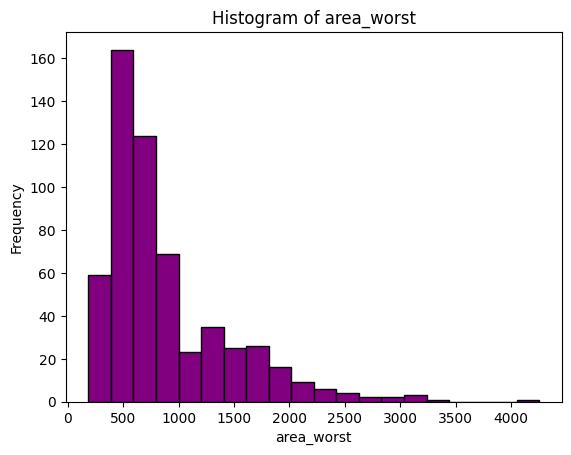

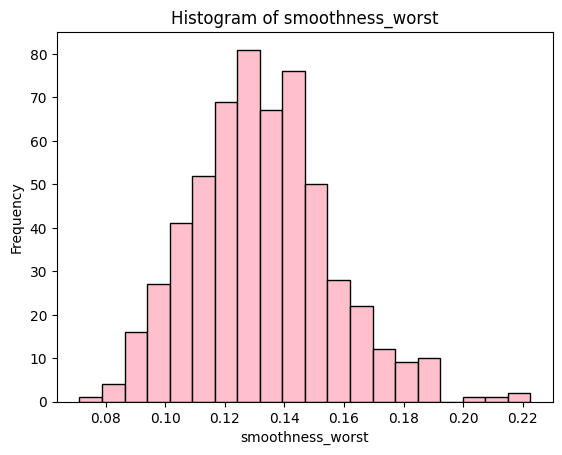

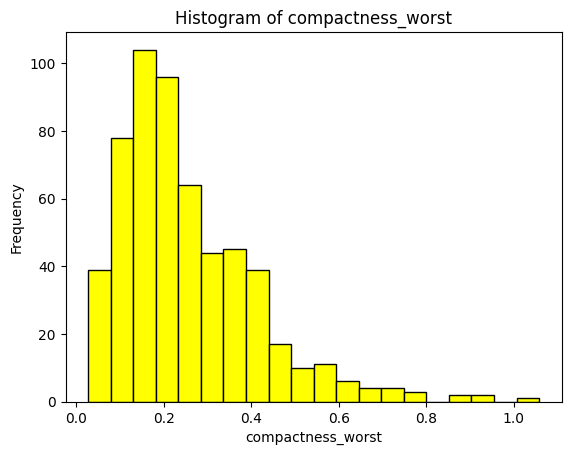

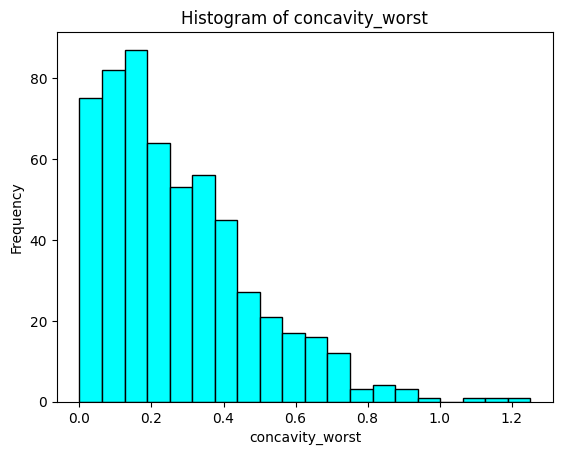

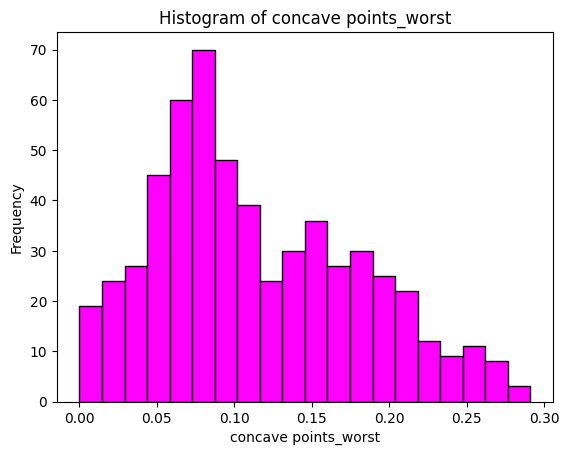

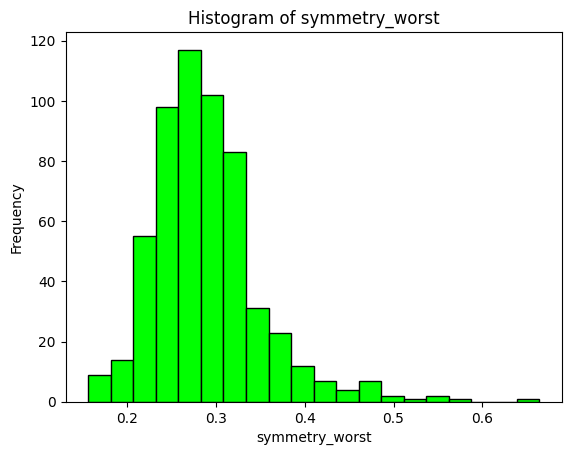

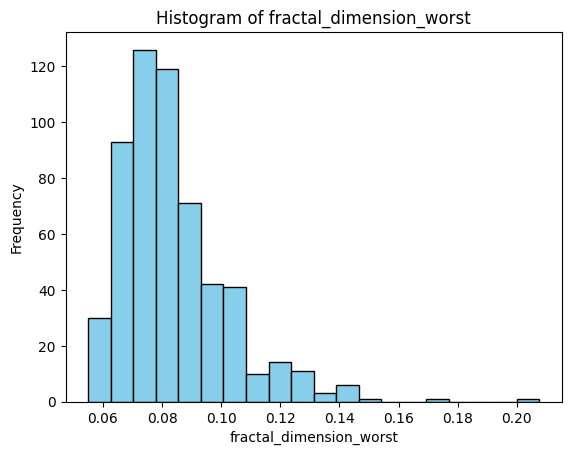

In [10]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime']
for i, column in enumerate(breast_cancer.columns):
    breast_cancer[column].hist(bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(False)
    plt.show()

standard scaling and splitting data into training AND TESTING DATA

In [11]:
x = breast_cancer.drop(["diagnosis"] , axis = 1)
y = breast_cancer["diagnosis"]
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
x = scaler.fit_transform(x)


In [12]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

LOGISTIC REGRESSION MODEL TRAINING

In [13]:

model_lr = LogisticRegression(max_iter = 10000)


In [14]:
model_lr.fit(x_train, y_train)



LogisticRegression(max_iter=10000)

In [15]:

y_pred = model_lr.predict(x_test)

In [16]:
y_pred

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

In [17]:
y_test.values

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

EVALUATION OF MODEL

In [18]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')                                                   

Accuracy: 0.9824561403508771


In [19]:
y_pred_training=model_lr.predict(x_train)

In [20]:
accuracy_training=accuracy_score(y_train,y_pred_training)

In [21]:
print("accuracy_training",accuracy_training)

accuracy_training 0.9912087912087912


CLASSIFICATION REPORT

In [22]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Naive bayes algorithm

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [24]:

predictions = gnb.predict(x_test)

print(predictions)

['M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'B']


In [25]:
print(accuracy_score(y_test, predictions))

0.9473684210526315


In [26]:
#here logistic model is performing well